<a href="https://colab.research.google.com/github/GithmiHashara/mnist-digit-recognition-tf/blob/main/Digit_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.18.0
GPU Available: []


1. Load and Explore Data

In [7]:
print("Loading MNIST dataset...")
# Load the MNIST dataset (built-in to TensorFlow)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Loading MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [8]:
# Display basic statistics
print(f"\nDataset Info:")
print(f"- Total training samples: {len(x_train):,}")
print(f"- Total test samples: {len(x_test):,}")
print(f"- Image dimensions: {x_train[0].shape}")
print(f"- Pixel value range: {x_train.min()} to {x_train.max()}")
print(f"- Number of classes: {len(np.unique(y_train))}")



Dataset Info:
- Total training samples: 60,000
- Total test samples: 10,000
- Image dimensions: (28, 28)
- Pixel value range: 0 to 255
- Number of classes: 10


2. Visualize sample images


 Visualizing sample images...


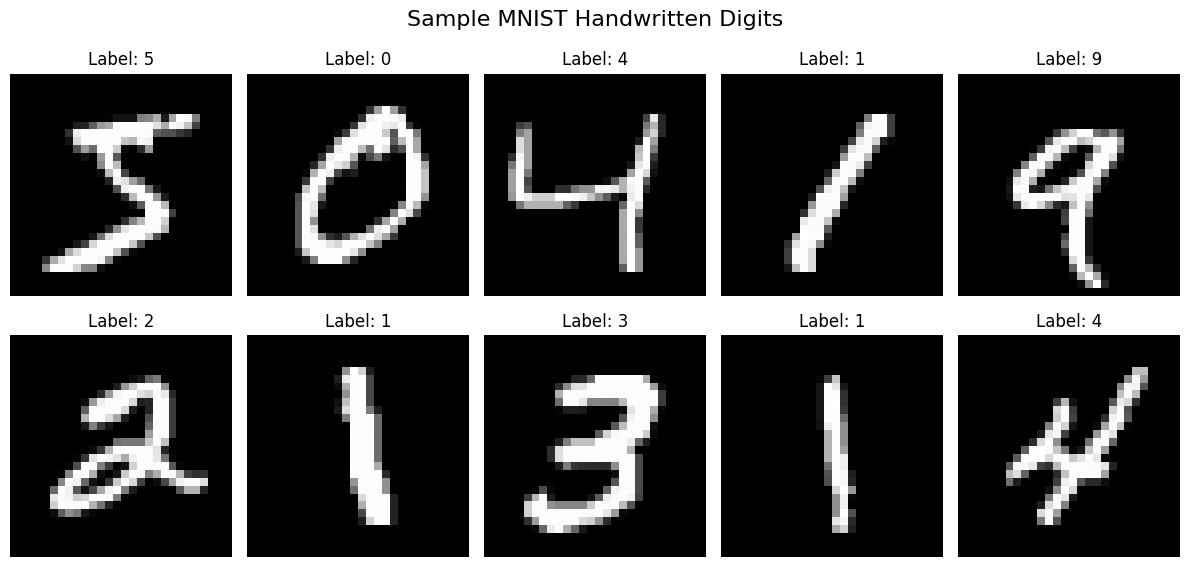

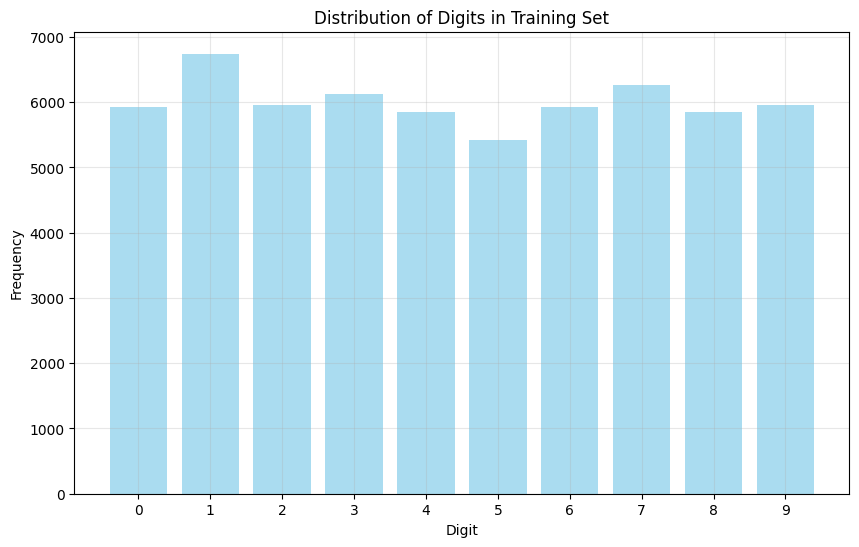

In [9]:
print("\n Visualizing sample images...")


# Plot sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('Sample MNIST Handwritten Digits', fontsize=16)

for i in range(10):
    row = i // 5
    col = i % 5
    axes[row, col].imshow(x_train[i], cmap='gray')
    axes[row, col].set_title(f'Label: {y_train[i]}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Show distribution of digits
plt.figure(figsize=(10, 6))
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts, color='skyblue', alpha=0.7)
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.title('Distribution of Digits in Training Set')
plt.xticks(unique)
plt.grid(True, alpha=0.3)
plt.show()

3. Preprocess the data

In [10]:
print("\n Preprocessing the data...")

# Normalize pixel values to 0-1 range
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# Reshape data for CNN (add channel dimension)
x_train_reshaped = x_train_normalized.reshape(-1, 28, 28, 1)
x_test_reshaped = x_test_normalized.reshape(-1, 28, 28, 1)

# Convert labels to categorical (one-hot encoding)
y_train_categorical = tf.keras.utils.to_categorical(y_train, 10)
y_test_categorical = tf.keras.utils.to_categorical(y_test, 10)

print(f"After preprocessing:")
print(f"- Training data shape: {x_train_reshaped.shape}")
print(f"- Training labels shape: {y_train_categorical.shape}")
print(f"- Pixel value range: {x_train_reshaped.min():.1f} to {x_train_reshaped.max():.1f}")


 Preprocessing the data...
After preprocessing:
- Training data shape: (60000, 28, 28, 1)
- Training labels shape: (60000, 10)
- Pixel value range: 0.0 to 1.0


4. Buid the CNN model

In [11]:
print("\n Building the CNN model...")

model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten and Dense Layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(10, activation='softmax')  # 10 classes (digits 0-9)
])

# Display model architecture
model.summary()

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


 Building the CNN model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

5. Train the model

In [13]:
# Train the model
history = model.fit(
    x_train_reshaped, y_train_categorical,
    epochs=10,
    batch_size=128,
    validation_data=(x_test_reshaped, y_test_categorical),
    verbose=1
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 61s 123ms/step - accuracy: 0.7562 - loss: 0.7542 - val_accuracy: 0.9806 - val_loss: 0.0626
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 91s 142ms/step - accuracy: 0.9635 - loss: 0.1265 - val_accuracy: 0.9849 - val_loss: 0.0445
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 71s 152ms/step - accuracy: 0.9748 - loss: 0.0873 - val_accuracy: 0.9899 - val_loss: 0.0315
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 62s 109ms/step - accuracy: 0.9821 - loss: 0.0643 - val_accuracy: 0.9909 - val_loss: 0.0302
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 105ms/step - accuracy: 0.9846 - loss: 0.0548 - val_accuracy: 0.9896 - val_loss: 0.0310
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 111ms/step - accuracy: 0.9859 - loss: 0.0489 - val_accuracy: 0.9922 - val_loss: 0.0244
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 114ms/step - accuracy: 0.9884 - loss: 0.0404 - val_accuracy: 0.9913 - val_loss: 0.0292
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 105ms/step - accuracy: 0.9909 - loss: 0

6. Evaluate the model


 Evaluating the model...
Test Accuracy: 0.9920 (99.20%)
Test Loss: 0.0290


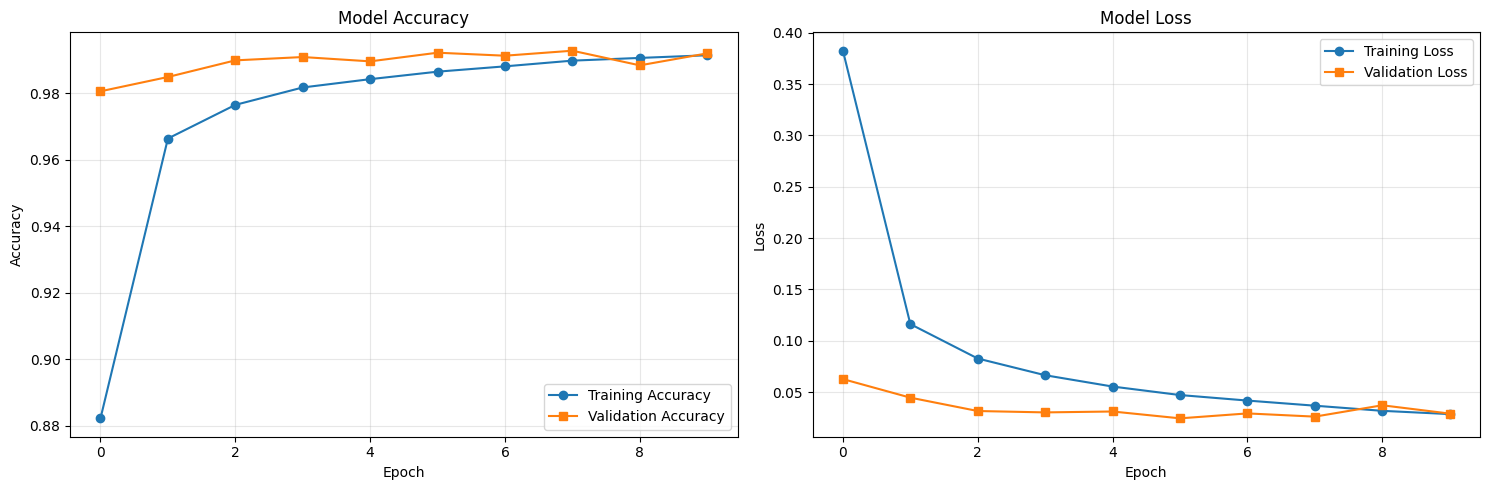

In [14]:
print("\n Evaluating the model...")

# Check if model exists, if not, create it
try:
    model
except NameError:
    print("Model not found. Creating model...")
    model = models.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),

        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Third Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu'),

        # Flatten and Dense Layers
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    print(" Model created but not trained. Please run the training step first!")

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test_categorical, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")

# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot loss
ax2.plot(history.history['loss'], label='Training Loss', marker='o')
ax2.plot(history.history['val_loss'], label='Validation Loss', marker='s')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

7. Make predictions and visulalize results


🔮 Making predictions...
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


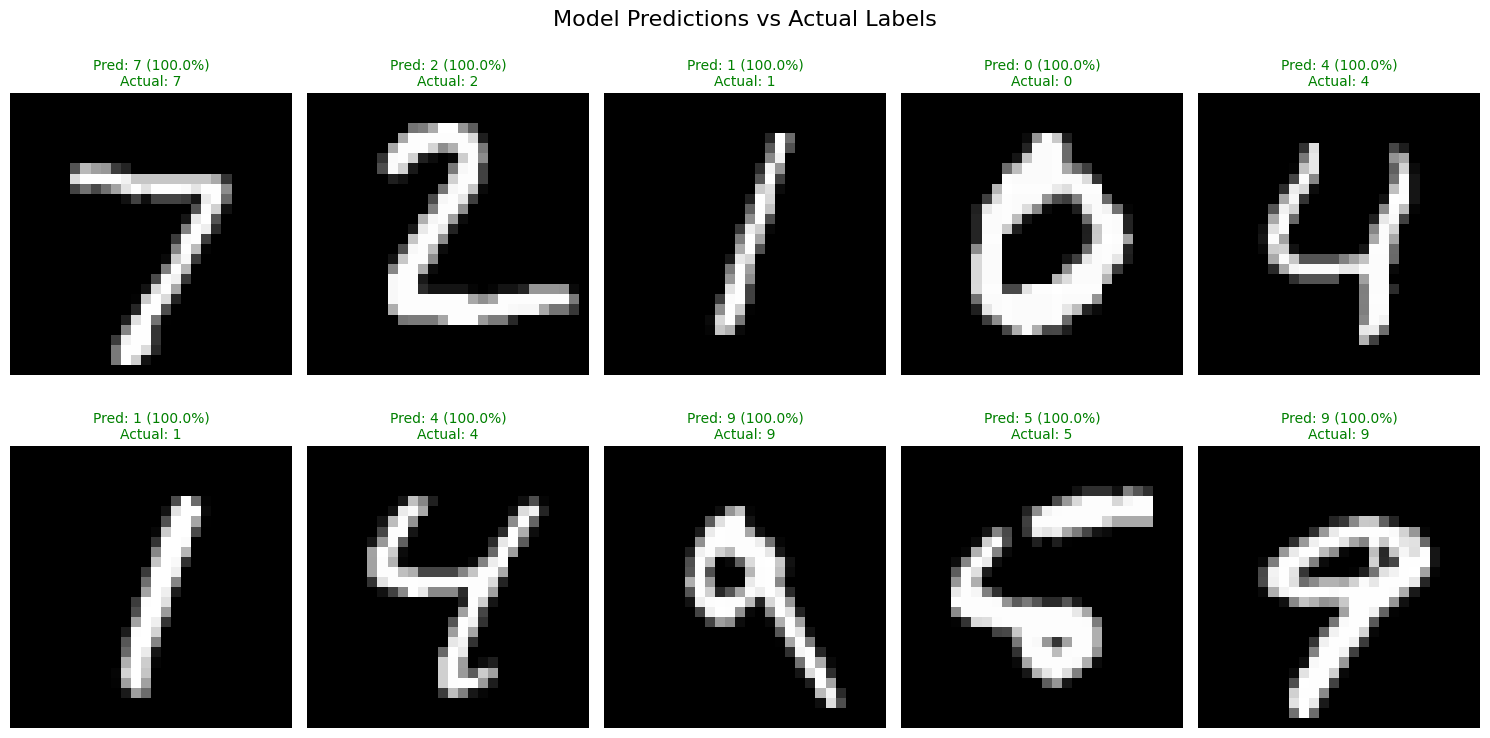

In [15]:
print("\n🔮 Making predictions...")

# Make predictions
predictions = model.predict(x_test_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# Show some predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
fig.suptitle('Model Predictions vs Actual Labels', fontsize=16)

for i in range(10):
    row = i // 5
    col = i % 5

    # Display image
    axes[row, col].imshow(x_test[i], cmap='gray')

    # Create title with prediction and confidence
    predicted_label = predicted_classes[i]
    actual_label = y_test[i]
    confidence = predictions[i][predicted_label] * 100

    color = 'green' if predicted_label == actual_label else 'red'
    title = f'Pred: {predicted_label} ({confidence:.1f}%)\nActual: {actual_label}'

    axes[row, col].set_title(title, color=color, fontsize=10)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

8. Confusion matrix and detailed analysis


 Detailed Analysis...


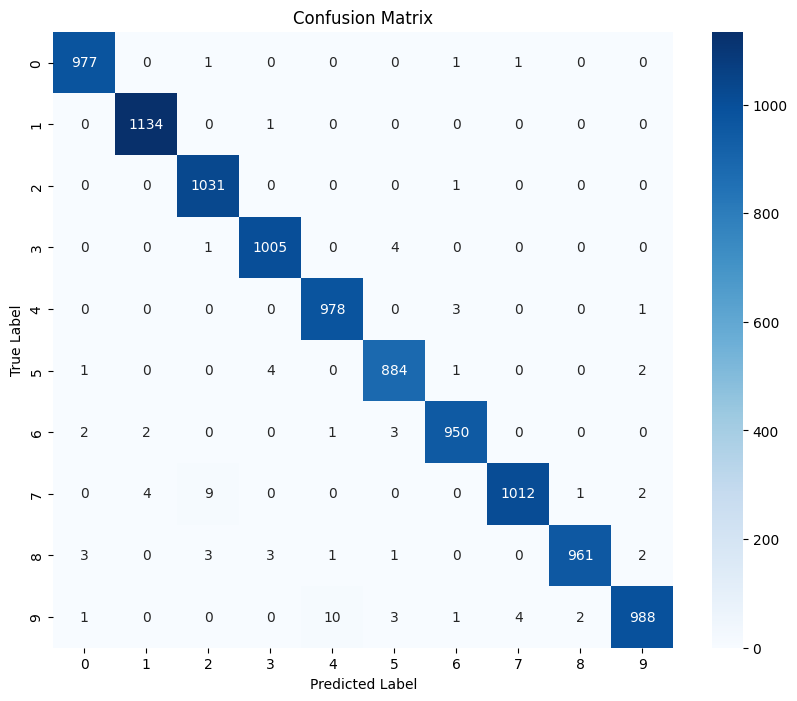


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.98      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000


Per-class Accuracies:
Digit 0: 0.9969 (99.69%)
Digit 1: 0.9991 (99.91%)
Digit 2: 0.9990 (99.90%)
Digit 3: 0.9950 (99.50%)
Digit 4: 0.9959 (99.59%)
Digit 5: 0.9910 (99.10%)
Digit 6: 0.9916 (99.16%)
Digit 7: 0.9844 (98

In [16]:
print("\n Detailed Analysis...")

# Create confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, predicted_classes))

# Calculate per-class accuracy
class_accuracies = cm.diagonal() / cm.sum(axis=1)
print("\nPer-class Accuracies:")
for i, acc in enumerate(class_accuracies):
    print(f"Digit {i}: {acc:.4f} ({acc*100:.2f}%)")

9. Test with custom input

In [17]:
print("\n Testing with random samples...")

# Test with a few random samples
indices = np.random.choice(len(x_test), 5, replace=False)

for idx in indices:
    # Get prediction
    single_prediction = model.predict(x_test_reshaped[idx:idx+1])
    predicted_digit = np.argmax(single_prediction)
    confidence = single_prediction[0][predicted_digit] * 100
    actual_digit = y_test[idx]

    print(f"Sample {idx}: Predicted={predicted_digit} ({confidence:.1f}%), Actual={actual_digit}")

print("\n MNIST Digit Recognition Complete!")
print(f"Final Test Accuracy: {test_accuracy*100:.2f}%")
print("\n Successfully built and trained a CNN for digit recognition!")


 Testing with random samples...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Sample 3500: Predicted=4 (100.0%), Actual=4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Sample 8146: Predicted=9 (100.0%), Actual=9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Sample 2485: Predicted=0 (100.0%), Actual=0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Sample 9342: Predicted=3 (98.2%), Actual=3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Sample 8487: Predicted=5 (100.0%), Actual=5

 MNIST Digit Recognition Complete!
Final Test Accuracy: 99.20%

 Successfully built and trained a CNN for digit recognition!
